<a href="https://colab.research.google.com/github/Pavan-16/Intership-Project/blob/master/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the required libraries ###

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Loading the data into the data frame ###

In [ ]:
df = pd.read_csv('/content/data.csv')
#top five rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
df.shape

(11914, 16)

### Checking the types of data ###

#### Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.####

In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### Dropping irrelevant colomns ###


#### This step is certainly needed in every EDA because sometimes there would be many columns that we never use, in such cases dropping is the only solution.#### 

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors','Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.shape

(11914, 10)

### Renaming the columns- ###


#### In this instance, most of the columns names are very confusing to read, so I just tweaked their columns names. ####

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.shape

(11914, 10)

### Dropping the duplicate rows- ###


#### This is often a handly thing to do because a huge dataset have some duplicate data which might be disturbing, so here I remove all duplicate values.

In [ ]:
df.shape

(11914, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [ ]:
# dropping duplicate rows
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### Dropping the missing or null values ###


#### This approach is not to do good so, beacause many people just replace the missing values with the mean or the average of that columns. ####

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


#### Here we can see the both cylinders and HP had less count.Therefore dropping the missing values. ####

In [ ]:
df = df.dropna()              # dropping the values
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [ ]:
print(df.isnull().sum())       # after dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


### Detecting outliers ###


#### It is good to detect and remove the outliers, because outliers are one of the primary reason for resulting in a less accurate model. ####


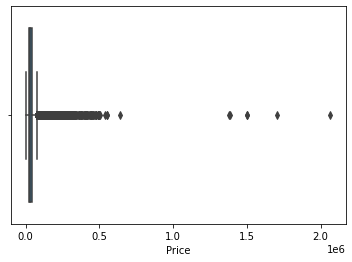

In [ ]:
sns.boxplot(x=df['Price'])

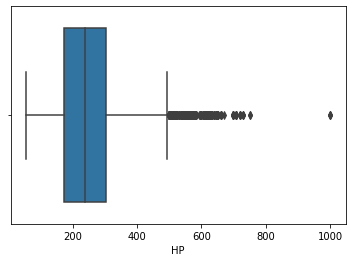

In [ ]:
sns.boxplot(x=df['HP'])

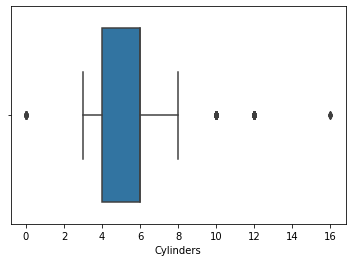

In [ ]:
sns.boxplot(x=df['Cylinders'])

#### Now I'm going to perform is called Interquartile range(IQR) score technique.####

In [ ]:
df.shape

(10827, 10)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

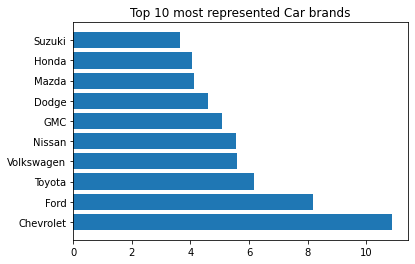

In [ ]:
l = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
t = l.index[:10]
plt.barh(t, width = l[:10])
plt.title("Top 10 most represented Car brands")
plt.show()



In [ ]:
avg = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
                                       (df['Make'] == 'Ford')|
                                       (df['Make'] == 'Toyota')|
                                       (df['Make'] == 'Volkswagen')|
                                       (df['Make'] == 'Nissan')|
                                       (df['Make'] == 'GMC')|
                                       (df['Make'] == 'Dodge')|
                                       (df['Make'] == 'Mazda')|
                                       (df['Make'] == 'Honda')|
                                       (df['Make'] == 'Suzuki')].groupby('Make').mean()
                                       
print(avg)

                   Price
Make                    
Chevrolet   28630.917083
Dodge       26190.560284
Ford        28605.915007
GMC         33462.654506
Honda       27400.455526
Mazda       20495.820106
Nissan      28404.013672
Suzuki      18361.295522
Toyota      27860.319224
Volkswagen  29032.817476


In [ ]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


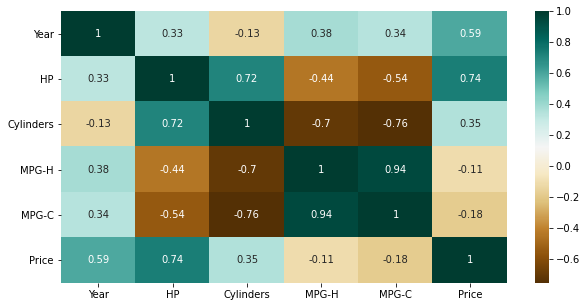

In [ ]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True )

->high positive correlation between hp and price

->high negative correlation between mpg-h,mpg-c and cylinders




### Data visualization using scatter and histogram and count plot-###

### 1. Histogram- ###


#### Histogram is one of the best solution which lets us know the total Number of car manufactured. ####

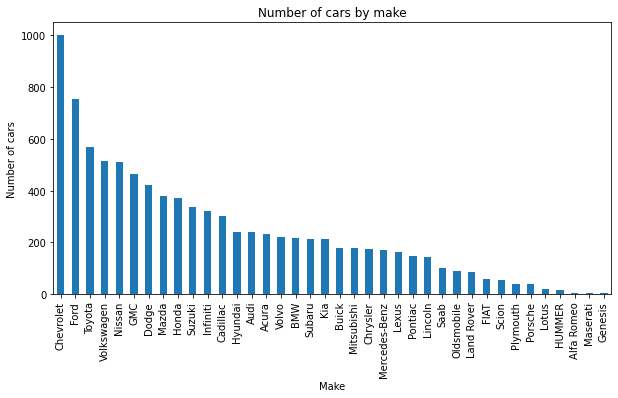

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');


### Count plot- ###



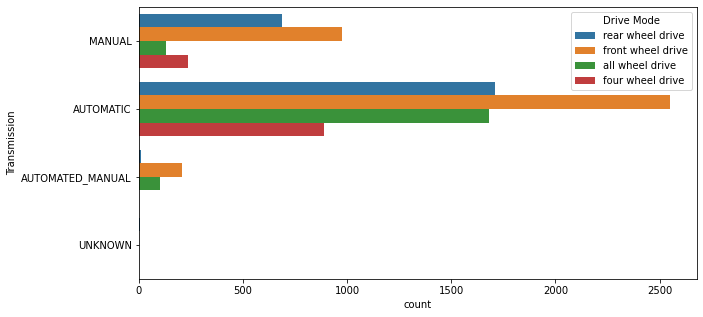

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='Transmission',data=df, hue='Drive Mode')

### Scatter plot- ###


#### To find the correlation between two variables.####

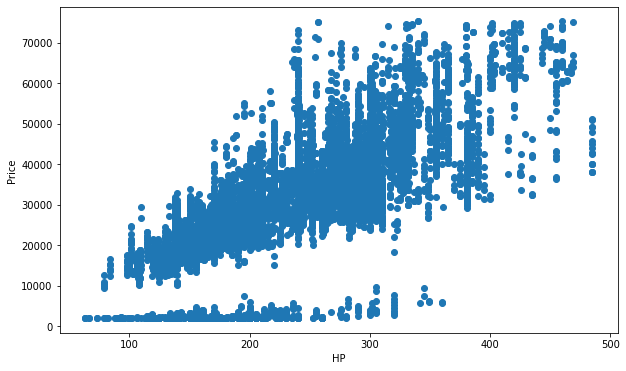

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

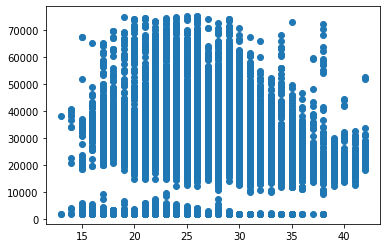

In [ ]:
plt.scatter(df['MPG-H'],df['Price'])

###Building ML model and splitting the training and test set in 80-20 ratio###

In [ ]:
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
#one hot encoding
df = pd.get_dummies(df,drop_first=True)


In [ ]:
df

,Year,HP,Cylinders,MPG-H,MPG-C,Price,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_Ford,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Mazda,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Saab,Make_Scion,Make_Subaru,Make_Suzuki,...,Model_X4,Model_X5,Model_X6,Model_XC,Model_XC60,Model_XC70,Model_XC90,Model_XG300,Model_XG350,Model_XL-7,Model_XL7,Model_XT5,Model_XTS,Model_XV Crosstrek,Model_Xterra,Model_Yaris,Model_Yaris iA,Model_Yukon,Model_Yukon Denali,Model_Yukon Hybrid,Model_Yukon XL,Model_Z3,Model_Z4,Model_Z4 M,Model_ZDX,Model_Zephyr,Model_allroad,Model_allroad quattro,Model_iA,Model_iM,Model_tC,Model_xA,Model_xB,Model_xD,Transmission_AUTOMATIC,Transmission_MANUAL,Transmission_UNKNOWN,Drive Mode_four wheel drive,Drive Mode_front wheel drive,Drive Mode_rear wheel drive
0,2011,335.0,6.0,26,19,46135,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2011,300.0,6.0,28,19,40650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2011,300.0,6.0,28,20,36350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2011,230.0,6.0,28,18,29450,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,2011,230.0,6.0,28,18,34500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11910,2012,300.0,6.0,23,16,56670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11911,2012,300.0,6.0,23,16,50620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11912,2013,300.0,6.0,23,16,50920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
y = df['Price']
df = df.drop(['Price'], axis=1)

In [ ]:
df.shape

(9191, 736)

In [ ]:
X = df.iloc[:,0:737].values
y = y.values

In [ ]:
X,y

(array([[2.011e+03, 3.350e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        [2.011e+03, 3.000e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        [2.011e+03, 3.000e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        ...,
        [2.012e+03, 3.000e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.013e+03, 3.000e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.006e+03, 2.210e+02, 6.000e+00, ..., 0.000e+00, 1.000e+00,
         0.000e+00]]), array([46135, 40650, 36350, ..., 50620, 50920, 28995]))

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
st_y= StandardScaler()  
X= st_x.fit_transform(X)    
y= st_x.fit_transform(y.reshape(-1,1)) 

In [ ]:
#80-20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

###Random forest and SVM - 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor=RandomForestRegressor(n_estimators=300)

In [ ]:
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=regressor.predict(X_test)                     
y_pred

array([-0.14151998,  0.21522709, -0.22846826, ..., -0.06554359,
        0.69137209, -1.85887649])

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))     
r2 = metrics.r2_score(y_test,y_pred)  
print(mae)
print(rmse)
print(r2)

0.17286190797390893
0.24094776457233935
0.9422437586795158


###SVM-###

In [ ]:
from sklearn.svm import SVR 
regressor1 = SVR(kernel = 'rbf') 
regressor1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor1.predict(X_test)                     
y_pred

array([-0.3645996 ,  0.34136648, -0.30639014, ..., -0.12982542,
        0.67230747, -1.87122089])

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))     
r2 = metrics.r2_score(y_test,y_pred)  
print(mae)
print(rmse)
print(r2)


0.21410372512363982
0.3417488036630934
0.8838104351113688
